In [2]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load Training data

In [3]:
df = pd.read_csv('/Users/bryanburzon/School/DS207/mids-207-final-project-summer23-Burzon-Brown-Caldera-Gomez/icr-identify-age-related-conditions/train.csv')
df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


### Data Types

In [49]:
df.dtypes

Id        object
AB       float64
AF       float64
AH       float64
AM       float64
AR       float64
AX       float64
AY       float64
AZ       float64
BC       float64
BD       float64
BN       float64
BP       float64
BQ       float64
BR       float64
BZ       float64
CB       float64
CC       float64
CD       float64
CF       float64
CH       float64
CL       float64
CR       float64
CS       float64
CU       float64
CW       float64
DA       float64
DE       float64
DF       float64
DH       float64
DI       float64
DL       float64
DN       float64
DU       float64
DV       float64
DY       float64
EB       float64
EE       float64
EG       float64
EH       float64
EJ        object
EL       float64
EP       float64
EU       float64
FC       float64
FD       float64
FE       float64
FI       float64
FL       float64
FR       float64
FS       float64
GB       float64
GE       float64
GF       float64
GH       float64
GI       float64
GL       float64
Class      int64
dtype: object

In [50]:
df["EJ"]

0      B
1      A
2      B
3      B
4      B
      ..
612    A
613    B
614    A
615    B
616    A
Name: EJ, Length: 617, dtype: object

### Shape

In [10]:
df.shape

(617, 58)

### Columns 

In [12]:
columns = df.columns.tolist()
columns

['Id',
 'AB',
 'AF',
 'AH',
 'AM',
 'AR',
 'AX',
 'AY',
 'AZ',
 'BC',
 'BD ',
 'BN',
 'BP',
 'BQ',
 'BR',
 'BZ',
 'CB',
 'CC',
 'CD ',
 'CF',
 'CH',
 'CL',
 'CR',
 'CS',
 'CU',
 'CW ',
 'DA',
 'DE',
 'DF',
 'DH',
 'DI',
 'DL',
 'DN',
 'DU',
 'DV',
 'DY',
 'EB',
 'EE',
 'EG',
 'EH',
 'EJ',
 'EL',
 'EP',
 'EU',
 'FC',
 'FD ',
 'FE',
 'FI',
 'FL',
 'FR',
 'FS',
 'GB',
 'GE',
 'GF',
 'GH',
 'GI',
 'GL',
 'Class']

### Initial Summary Stat of each column 

In [20]:
df.describe()

count    617.000000
mean       0.477149
std        0.468388
min        0.081187
25%        0.252107
50%        0.354659
75%        0.559763
max        6.161666
Name: AB, dtype: float64

### Count NA

In [37]:
col_with_NA = df.isna().sum() > 0
col_with_NA[col_with_NA ==True]

#col_with_NA.index.to_list()
na_col = col_with_NA[col_with_NA ==True].index.to_list()

df[na_col].isna().sum()

BQ    60
CB     2
CC     3
DU     1
EL    60
FC     1
FL     1
FS     2
GL     1
dtype: int64

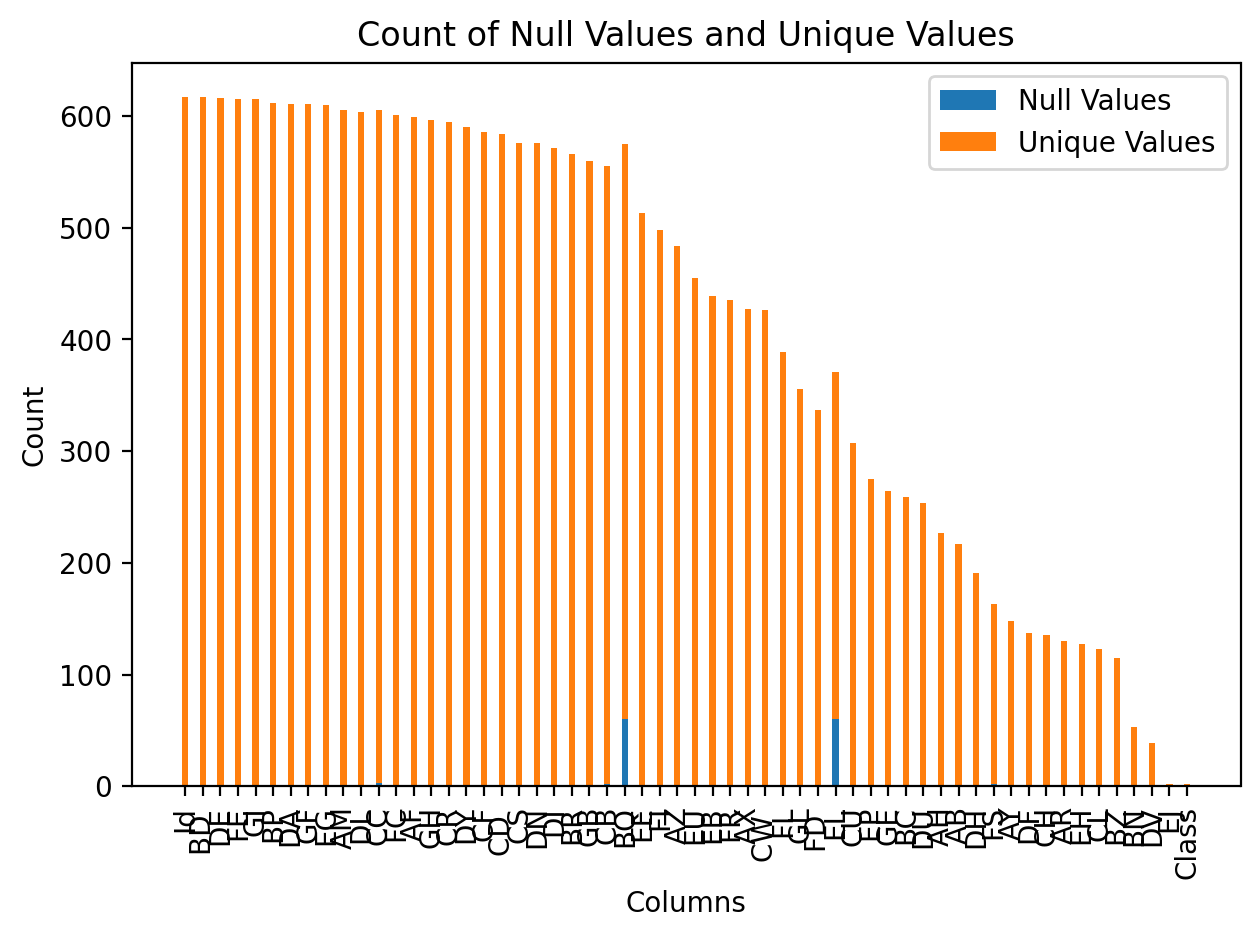

In [7]:
# Assuming you have a dataframe named 'df'
# Create a list to store the column names
columns = df.columns.tolist()

# Create empty lists to store the counts
null_counts = []
unique_counts = []

# Iterate through each column in the dataframe
for column in columns:
    null_count = df[column].isnull().sum()  # Count the number of null values in the column
    unique_count = df[column].nunique()  # Count the number of unique values in the column
    
    null_counts.append(null_count)
    unique_counts.append(unique_count)

columns, null_counts, unique_counts = zip(*sorted(zip(columns, null_counts, unique_counts), key=lambda x: x[2], reverse=True))


# Plotting the stacked bar chart
x = range(len(columns))  # X-axis values
width = 0.35  # Width of the bars

fig, ax = plt.subplots()
ax.bar(x, null_counts, width, label='Null Values')
ax.bar(x, unique_counts, width, bottom=null_counts, label='Unique Values')

ax.set_ylabel('Count')
ax.set_xlabel('Columns')
ax.set_title('Count of Null Values and Unique Values')
ax.set_xticks(x)
ax.set_xticklabels(columns, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

In [5]:
for column in df.columns:
    unique_count = df[column].nunique()  # Count the number of unique values in the column
    null_count = df[column].isnull().sum()
    print(f"Column '{column}' has {unique_count} unique value(s) and has {null_count} null value(s).")

Column 'Id' has 617 unique value(s) and has 0 null value(s).
Column 'AB' has 217 unique value(s) and has 0 null value(s).
Column 'AF' has 599 unique value(s) and has 0 null value(s).
Column 'AH' has 227 unique value(s) and has 0 null value(s).
Column 'AM' has 605 unique value(s) and has 0 null value(s).
Column 'AR' has 130 unique value(s) and has 0 null value(s).
Column 'AX' has 427 unique value(s) and has 0 null value(s).
Column 'AY' has 148 unique value(s) and has 0 null value(s).
Column 'AZ' has 484 unique value(s) and has 0 null value(s).
Column 'BC' has 259 unique value(s) and has 0 null value(s).
Column 'BD ' has 617 unique value(s) and has 0 null value(s).
Column 'BN' has 53 unique value(s) and has 0 null value(s).
Column 'BP' has 612 unique value(s) and has 0 null value(s).
Column 'BQ' has 515 unique value(s) and has 60 null value(s).
Column 'BR' has 566 unique value(s) and has 0 null value(s).
Column 'BZ' has 115 unique value(s) and has 0 null value(s).
Column 'CB' has 553 uni

In [13]:
df[['BD ', 'Id']].sort_values('BD ')

,BD,Id
221,1693.62432,58e74efe7aa5
205,2103.14378,4fef9a973791
146,2141.75945,3a288ec2811f
132,2156.50899,34dc3190c6fb
174,2185.25701,4401d2485580
...,...,...
14,10563.27538,075bd937ab85
11,12083.34891,06554e7b9979
150,27276.36188,3bbe922b2cdb
10,43882.27850,06055f3f6785


### Correlation 

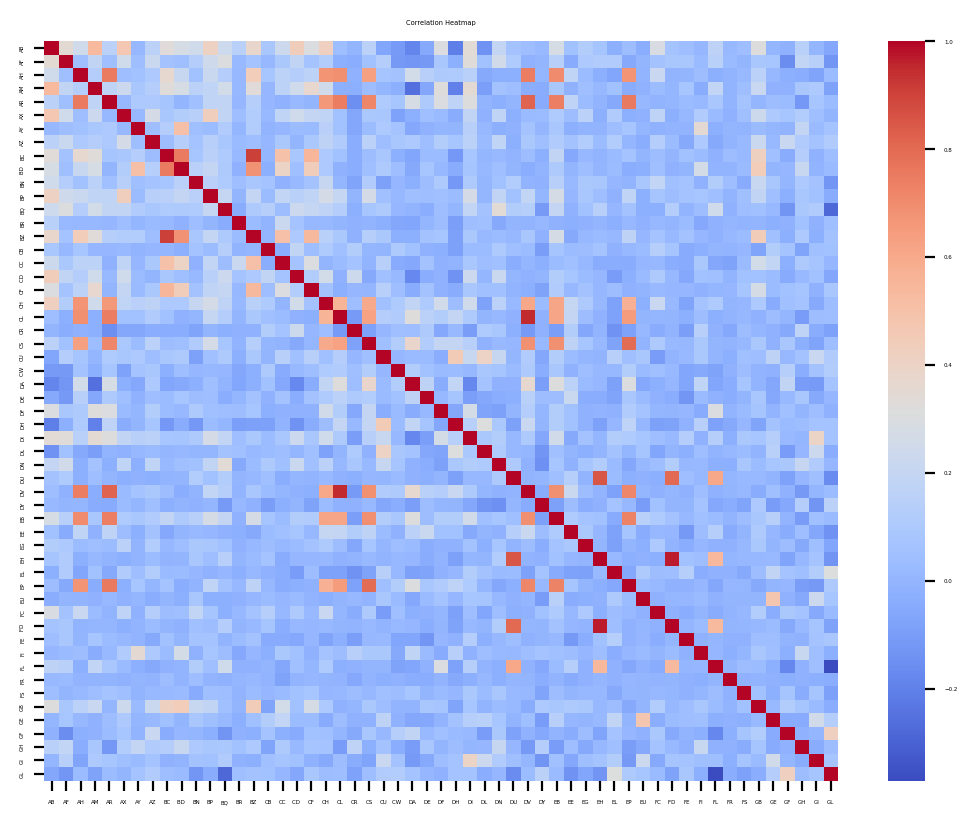

In [64]:
df_without_EJ_class =df.drop('EJ', axis=1)
df_without_EJ_class = df_without_EJ_class.drop('Class', axis=1)

coor_matrix = df_without_EJ_class.iloc[:,1:].corr()

sns.heatmap(coor_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.rcParams['font.size'] = 2
plt.title('Correlation Heatmap')
plt.show()

